In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [19]:
df =  pd.read_csv("D:\CSV files\income.csv")

In [20]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [21]:
df.tail()

,Name,Age,Income
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


In [22]:
df.shape

(22, 3)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [24]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [25]:
df.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90704.545455
std,5.901060,43953.075382
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [26]:
df.drop("Name",axis=1,inplace=True)

In [27]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


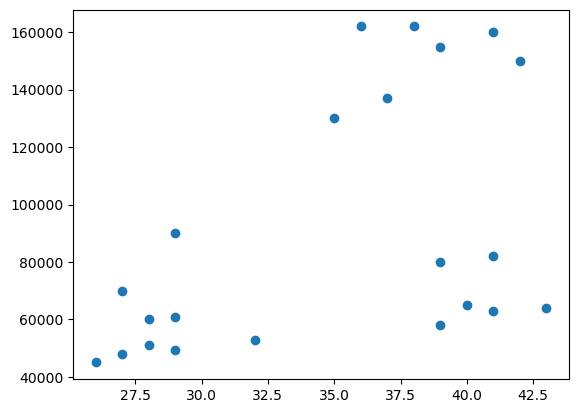

In [28]:
plt.scatter(df["Age"],df["Income"])
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
df['Age'] = scaler.fit_transform(df[["Age"]])

In [32]:
df['Income'] = scaler.fit_transform(df[["Income"]])

In [33]:
df.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [34]:
from sklearn.cluster import KMeans

In [35]:
model = KMeans(n_clusters=3)
model.fit(df[["Age","Income"]])

KMeans(n_clusters=3)

In [36]:
model.predict(df[["Age","Income"]])

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [37]:
df["clusters"] = model.predict(df[["Age","Income"]])

In [38]:
df.head()

,Age,Income,clusters
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [39]:
df0 = df[df["clusters"]==0]
df1 = df[df["clusters"]==1]
df2 = df[df["clusters"]==2]

In [40]:
df0

,Age,Income,clusters
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,1.000000,0
9,0.529412,0.726496,0
10,0.647059,0.786325,0


In [41]:
df1

,Age,Income,clusters
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
11,0.000000,0.000000,1
12,0.058824,0.025641,1
13,0.117647,0.051282,1
14,0.176471,0.038462,1
15,0.352941,0.068376,1


In [42]:
df2

,Age,Income,clusters
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2
21,0.764706,0.111111,2


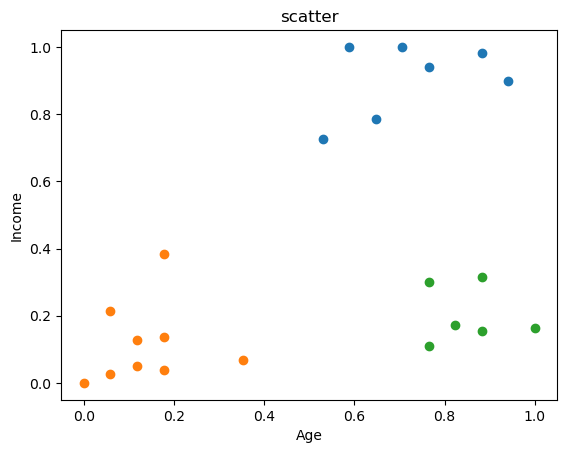

In [43]:
plt.scatter(df0["Age"],df0["Income"])
plt.scatter(df1["Age"],df1["Income"])
plt.scatter(df2["Age"],df2["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title('scatter')
plt.show()

In [44]:
model.cluster_centers_

array([[0.72268908, 0.9047619 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [45]:
model.cluster_centers_[:,0]

array([0.72268908, 0.1372549 , 0.85294118])

In [46]:
model.cluster_centers_[:,1]

array([0.9047619 , 0.11633428, 0.2022792 ])

In [47]:
model.inertia_

0.48259220352300936

In [48]:
sse = []
krange = range(1,10)
for i in krange:
    model = KMeans(n_clusters=i)
    model.fit(df[["Age", "Income"]])
    sse.append(model.inertia_)

In [49]:
krange

range(1, 10)

In [50]:
sse

[5.493999956592008,
 2.353128345140293,
 0.48259220352300936,
 0.36400718588289455,
 0.29032568823939764,
 0.28622159022689153,
 0.19180514376149196,
 0.14006065537429213,
 0.1130543414032753]

Text(0.5, 1.0, 'Scatter')

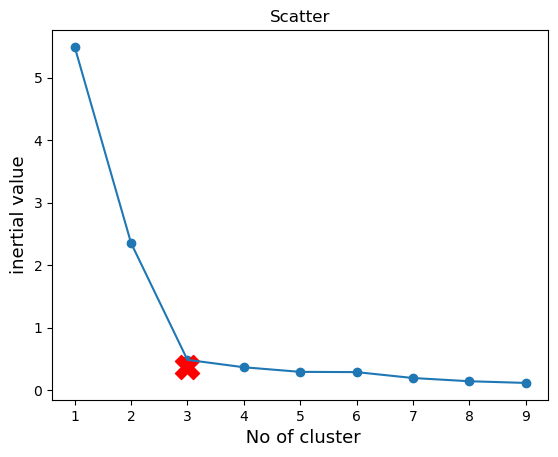

In [51]:
plt.plot(krange, sse)
plt.scatter(krange, sse)
plt.scatter(3, sse[3], marker="X",s=300, c="r")
plt.xlabel(" No of cluster", size=13) 
plt.ylabel("inertial value", size=13)
plt.title("Scatter")